# Exemple `filters.steerable_oriented_energy_2d` et visualisation

Exemple d'utilisation d'un filtre orientable 2D d'ordre 2 et de la visualisation des résultats

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

from linumpy import filters, viz

(256, 256) float32 0.0 1.0


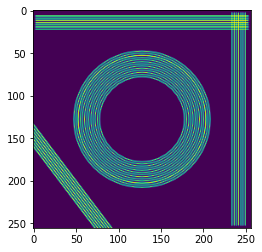

In [2]:
# Lecture d'un fantome asymétrique
filename = "../data/phantom2d_circle.tif"
img = imageio.imread(filename)
print(img.shape, img.dtype, img.min(), img.max())
plt.imshow(img); plt.show()

In [3]:
# Parameters
n_angles = 30
angles = np.linspace(0, np.pi, n_angles)

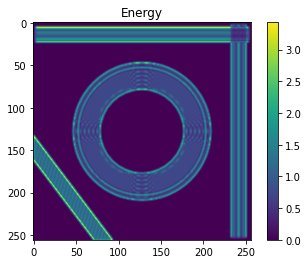

In [4]:
# Order 2 ODF
odf = filters.steerable_oriented_energy_2d(img, thetas=angles, order=2)
odf_dominant = angles[odf.argmax(axis=0)]
energy_amplitude = odf.max(axis=0)
plt.title("Energy")
plt.imshow(energy_amplitude); plt.colorbar(); plt.show()

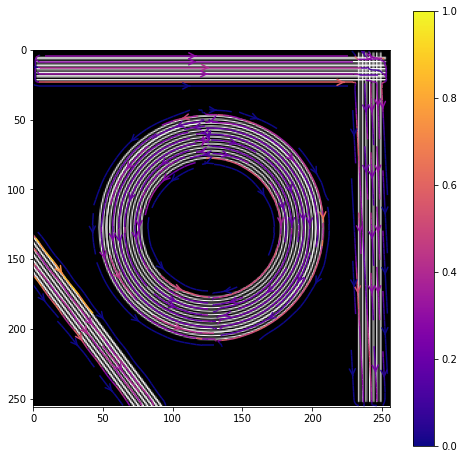

In [5]:
# Steamline plot
# Reference : https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/

y = np.arange(img.shape[0])
x = np.arange(img.shape[1])
dx = np.cos(odf_dominant) * energy_amplitude / energy_amplitude.max()
dy = np.sin(odf_dominant) * energy_amplitude / energy_amplitude.max()
color = energy_amplitude / energy_amplitude.max()

plt.figure(figsize=(8,8))
plt.imshow(img, cmap="gray")
plt.streamplot(x,y,dx,dy,color=color,density=2,cmap=plt.cm.plasma, arrowstyle='->', arrowsize=1.5)
plt.colorbar()
plt.xlim([0,img.shape[1]])
plt.ylim([img.shape[0],0])
plt.show()

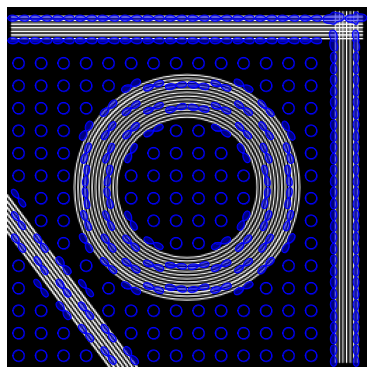

In [6]:
# Single-voxel odf display
viz.odf_grid(img, odf, angles, distance=16)
plt.show()

100%|██████████| 16/16 [00:15<00:00,  1.02it/s]


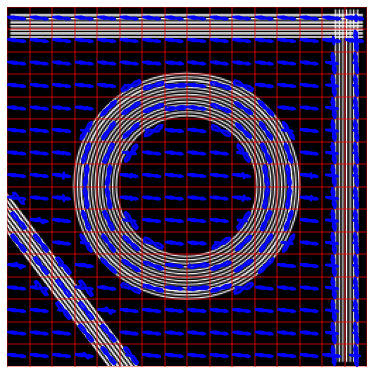

In [7]:
# ROI odf display (rotated)
viz.odf_grid_roi_overlay(img, odf_dominant, roi_size=16)
plt.show()